In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from copy import deepcopy
import tensorflow as ts
import keras
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

#### Dataset Link: https://www.kaggle.com/kianwee/foreign-exchange-rate-1994-2020

In [2]:
originaldata = pd.read_csv(r'C:\Users\kommi\Documents\S5\ML\Project\Exchange_Rate_Report.csv')

In [3]:
originaldata.describe()

,Algerian dinar (DZD),Australian dollar (AUD),Austrian schilling (ATS),Belgian franc (BEF),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),Chinese yuan (CNY),...,South African rand (ZAR),Spanish peseta (ESP),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD),Uruguayan peso (UYU)
count,2287.000000,6381.000000,1236.000000,993.000000,5131.000000,6127.000000,5168.000000,6308.000000,5207.000000,5104.000000,...,6123.000000,1223.000000,6305.000000,6439.000000,6093.000000,5986.000000,6598.000000,6563.000000,6697.0,2108.000000
mean,95.750555,0.762778,11.334135,33.134852,0.187994,23.522967,1.496079,1.275644,572.300405,7.281247,...,8.353815,136.244716,7.847176,1.200411,34.499999,6.322398,3.672266,1.589525,1.0,26.094563
std,17.986033,0.136274,0.988560,3.166331,0.414504,175.959465,0.188630,0.179188,82.450954,0.836744,...,3.290221,11.133943,1.105440,0.244789,5.670173,0.226999,0.000545,0.184522,0.0,5.580171
min,71.293000,0.483300,9.569000,27.837500,0.085500,0.827000,1.200900,0.917000,377.500000,6.093000,...,3.400000,118.380000,5.842500,0.725300,24.440000,5.572100,3.671000,1.203100,1.0,9.320000
25%,78.327550,0.679800,10.479250,30.392500,0.110050,1.722400,1.351175,1.107200,506.880000,6.536325,...,6.156500,126.510000,6.920000,0.983050,31.008000,6.257400,3.672500,1.483850,1.0,20.843250
50%,98.283800,0.751400,11.159000,32.187500,0.149800,2.144800,1.430750,1.314550,544.500000,6.915350,...,7.570000,132.990000,7.734500,1.173600,33.904000,6.284000,3.672500,1.583000,1.0,26.402000
75%,111.407700,0.828000,12.202250,36.342500,0.182000,3.046150,1.690500,1.388950,642.210000,8.276800,...,10.569000,145.715000,8.517500,1.375450,38.968000,6.401600,3.672500,1.663250,1.0,29.739500
max,121.088700,1.105500,13.294000,38.962500,4.841400,2698.000000,1.851000,1.613200,816.260000,8.746000,...,16.770850,159.360000,10.995000,1.822800,56.061000,6.788900,3.675000,2.102000,1.0,39.152000


In [4]:
originaldata.head()

,Date,Algerian dinar (DZD),Australian dollar (AUD),Austrian schilling (ATS),Belgian franc (BEF),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),...,South African rand (ZAR),Spanish peseta (ESP),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD),Uruguayan peso (UYU)
0,3-Jan-1994,NaN,NaN,12.194,NaN,NaN,326.095,NaN,NaN,NaN,...,3.4,142.81,8.3630,1.4790,NaN,5.83400,3.671,NaN,1.0,NaN
1,4-Jan-1994,NaN,0.6873,12.234,NaN,NaN,331.210,NaN,1.3174,NaN,...,3.4,143.57,8.3685,1.4870,25.58,5.82041,3.671,1.4820,1.0,NaN
2,5-Jan-1994,NaN,0.6870,12.187,NaN,NaN,336.470,NaN,1.3180,NaN,...,3.4,143.74,8.2435,1.4790,25.56,5.82987,3.671,1.4862,1.0,NaN
3,6-Jan-1994,NaN,0.6857,NaN,NaN,NaN,341.810,NaN,1.3211,NaN,...,3.4,NaN,NaN,1.4750,25.57,5.82018,3.671,1.4843,1.0,NaN
4,7-Jan-1994,NaN,NaN,12.235,NaN,NaN,347.225,NaN,1.3234,NaN,...,3.4,145.61,8.2090,1.4805,25.55,5.80606,3.671,1.4836,1.0,NaN


# Data Preprocessing

In [5]:
print(originaldata.columns[0:10])

Index(['Date', 'Algerian dinar   (DZD)                     ',
       'Australian dollar   (AUD)                     ',
       'Austrian schilling   (ATS)                     ',
       'Belgian franc   (BEF)                     ',
       'Botswana pula   (BWP)                     ',
       'Brazilian real   (BRL)                     ',
       'Brunei dollar   (BND)                     ',
       'Canadian dollar   (CAD)                     ',
       'Chilean peso   (CLP)                     '],
      dtype='object')


In [6]:
originaldata.isnull().sum()

Date                                                  37
Algerian dinar   (DZD)                              4450
Australian dollar   (AUD)                            356
Austrian schilling   (ATS)                          5501
Belgian franc   (BEF)                               5744
Botswana pula   (BWP)                               1606
Brazilian real   (BRL)                               610
Brunei dollar   (BND)                               1569
Canadian dollar   (CAD)                              429
Chilean peso   (CLP)                                1530
Chinese yuan   (CNY)                                1633
Colombian peso   (COP)                               709
Czech koruna   (CZK)                                2163
Danish krone   (DKK)                                 315
Deutsche mark   (DEM)                               5484
Estonian kroon   (EEK)                              6737
Euro   (EUR)                                        1376
Finnish markka   (FIM)         

In [7]:
uncleaned_columns = originaldata.columns

In [8]:
def remove_spaces(s):
    g = ''
    k = 0
    for x in s:
        if(x != ' '):
            if(k):
                g += ' '
            k = 0
            g += x
        else:
            k+=1
    return g

In [9]:
cleaned_columns = []
for x in uncleaned_columns:
    cleaned_columns.append(remove_spaces(x))
print(cleaned_columns)

['Date', 'Algerian dinar (DZD)', 'Australian dollar (AUD)', 'Austrian schilling (ATS)', 'Belgian franc (BEF)', 'Botswana pula (BWP)', 'Brazilian real (BRL)', 'Brunei dollar (BND)', 'Canadian dollar (CAD)', 'Chilean peso (CLP)', 'Chinese yuan (CNY)', 'Colombian peso (COP)', 'Czech koruna (CZK)', 'Danish krone (DKK)', 'Deutsche mark (DEM)', 'Estonian kroon (EEK)', 'Euro (EUR)', 'Finnish markka (FIM)', 'French franc (FRF)', 'Greek drachma (GRD)', 'Indian rupee (INR)', 'Irish pound (IEP)', 'Israeli New Shekel (ILS)', 'Italian lira (ITL)', 'Japanese yen (JPY)', 'Korean won (KRW)', 'Kuwaiti dinar (KWD)', 'Luxembourg franc (LUF)', 'Malaysian ringgit (MYR)', 'Maltese lira (MTL)', 'Mauritian rupee (MUR)', 'Mexican peso (MXN)', 'Netherlands guilder (NLG)', 'New Zealand dollar (NZD)', 'Norwegian krone (NOK)', 'Omani rial (OMR)', 'Peruvian sol (PEN)', 'Philippine peso (PHP)', 'Polish zloty (PLN)', 'Portuguese escudo (PTE)', 'Qatari riyal (QAR)', 'Russian ruble (RUB)', 'Saudi Arabian riyal (SAR)', 

In [10]:
originaldata.columns = cleaned_columns

In [11]:
print(originaldata['Date'])

0       3-Jan-1994
1       4-Jan-1994
2       5-Jan-1994
3       6-Jan-1994
4       7-Jan-1994
           ...    
6732           NaN
6733           NaN
6734           NaN
6735           NaN
6736           NaN
Name: Date, Length: 6737, dtype: object


In [12]:
data = []
for x in originaldata.columns[1:len(originaldata.columns)]:
    data.append(originaldata[[originaldata.columns[0],x]])

In [13]:
print(len(data))

53


In [14]:
print(data[0])

            Date  Algerian dinar (DZD)
0     3-Jan-1994                   NaN
1     4-Jan-1994                   NaN
2     5-Jan-1994                   NaN
3     6-Jan-1994                   NaN
4     7-Jan-1994                   NaN
...          ...                   ...
6732         NaN                   NaN
6733         NaN                   NaN
6734         NaN                   NaN
6735         NaN                   NaN
6736         NaN                   NaN

[6737 rows x 2 columns]


In [15]:
for i in range(len(data)):
    columns = data[i].columns
    removalRows = []
    for j in range(data[i].shape[0]):
        if(math.isnan(data[i][columns[1]].values[j])):
            removalRows.append(j)
    temp = data[i].drop(removalRows,axis = 0)
    data[i] = deepcopy(temp)

In [16]:
print(data[0])

             Date  Algerian dinar (DZD)
4253  14-May-2010               74.9996
4259  24-May-2010               75.2979
4260  25-May-2010               75.6136
4261  26-May-2010               75.4628
4262  27-May-2010               75.5750
...           ...                   ...
6695  24-Feb-2020              120.9095
6696  25-Feb-2020              120.7883
6697  26-Feb-2020              120.7145
6698  27-Feb-2020              120.5406
6699  28-Feb-2020              120.0978

[2287 rows x 2 columns]


In [17]:
goodCurrencies = []
for i in range(len(data)):
    if(len(data[i][columns[0]]) == 0):
        continue
    lastDate = data[i][columns[0]].values[-1]
    if(lastDate[len(lastDate)-4:len(lastDate)]=='2020'):
        goodCurrencies.append(data[i])
data = goodCurrencies
print(len(data))

39


## Changing string datest to numpy.datetime64 using pandas

In [18]:
for i in range(len(data)):
    data[i]['Date'] = pd.to_datetime(data[i]['Date'].values)

In [19]:
print(type(data[0]['Date'].values[0]))

<class 'numpy.datetime64'>


In [20]:
for i in range(len(data)):
    data[i].set_index('Date',inplace = True)

# Summarization and visualization

In [21]:
sns.set(rc={'figure.figsize':(11, 4)})
majorCurrencies = ['Australian dollar (AUD)','Chinese yuan (CNY)','Euro (EUR)',
                  'Indian rupee (INR)','Japanese yen (JPY)','U.K. pound (GBP)']

## Linecharts

Text(0.5, 0.98, 'Major Exchange Rates')

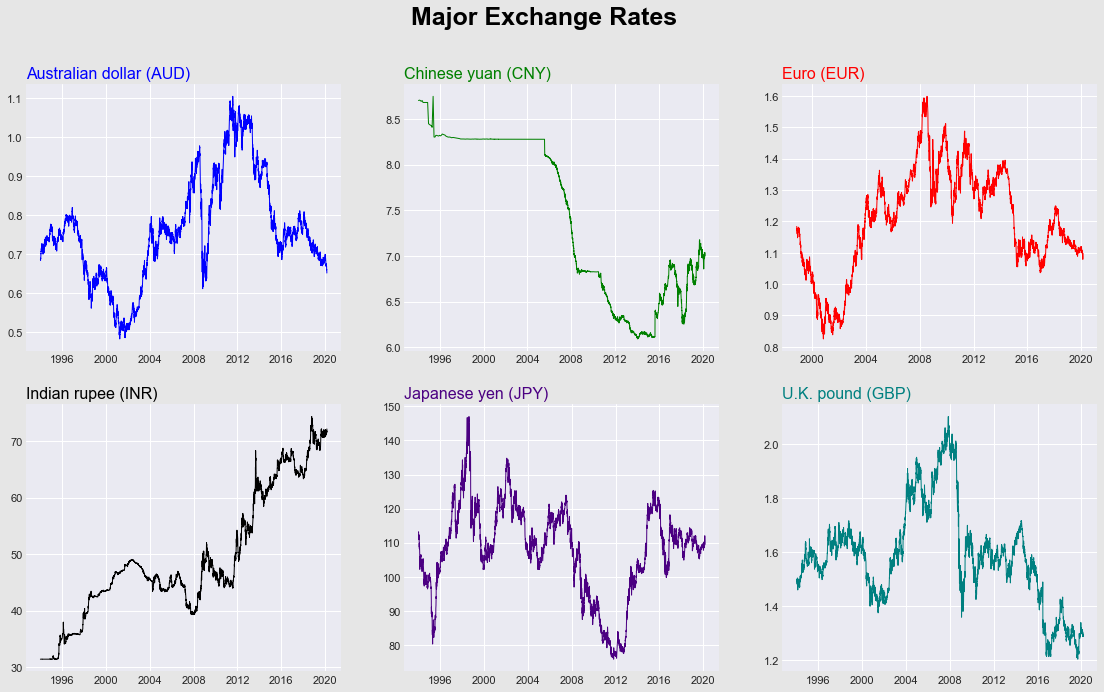

In [22]:
plt.figure(figsize=(19.2,10.8), facecolor = (0.900, 0.900, 0.900))
plt.style.use('seaborn-darkgrid')
palette = ['magenta','blue','green','red',
          'black','indigo','teal']
num=0
for x in data:
    if x.columns[0] not in majorCurrencies:
        continue
    num+=1
    plt.subplot(2,3, num)
    plt.plot(x[x.columns[0]], marker='', color=palette[num], linewidth=1, alpha=1, label=x.columns[0])
    plt.title(x.columns[0], loc='left', fontsize=16, fontweight=0, color=palette[num] )
plt.suptitle("Major Exchange Rates", fontsize=25, fontweight=0, color='black', weight = 'bold', y=0.98)

## Scatterplot

Text(0.5, 0.98, 'Major Exchange Rates')

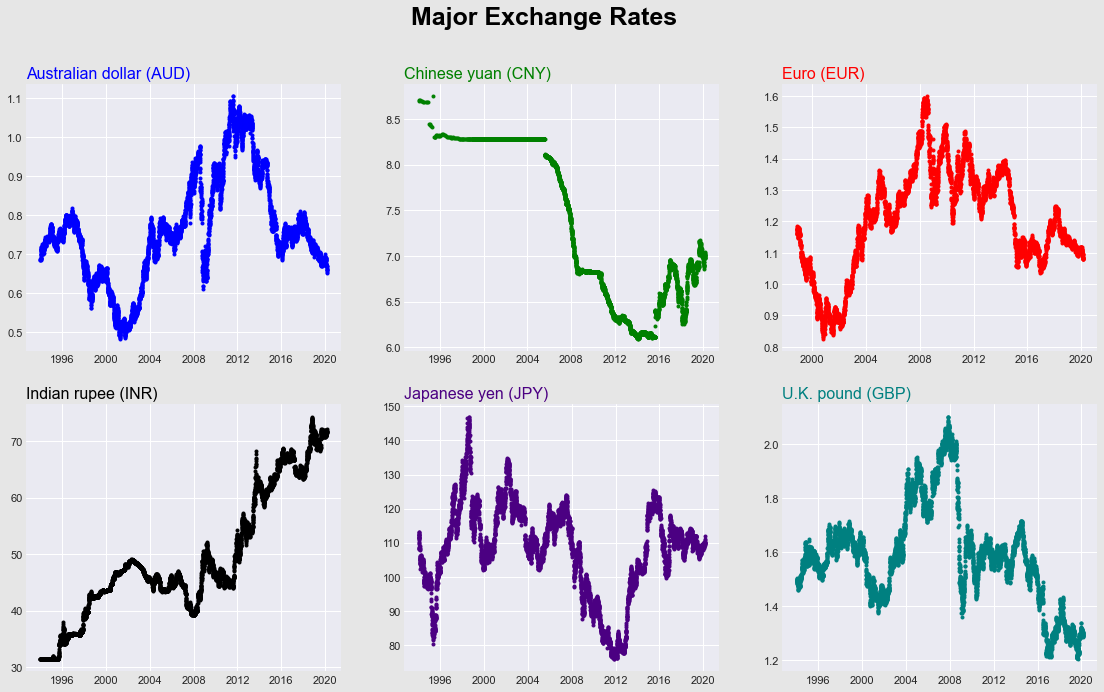

In [23]:
plt.figure(figsize=(19.2,10.8), facecolor = (0.900, 0.900, 0.900))
num=0
for x in data:
    if x.columns[0] not in majorCurrencies:
        continue
    num+=1
    colname = deepcopy(x.columns[0])
    colname = colname[0:min(30,len(colname))]
    plt.subplot(2,3, num)
    plt.plot(x[x.columns[0]], marker='.', color=palette[num], alpha=1, label=x.columns[0],linestyle = 'None')
    plt.title(colname, loc='left', fontsize=16, fontweight=0, color=palette[num] )
plt.suptitle("Major Exchange Rates", fontsize=25, fontweight=0, color='black', weight = 'bold', y=0.98)

## Boxplots

<Figure size 1382.4x777.6 with 0 Axes>

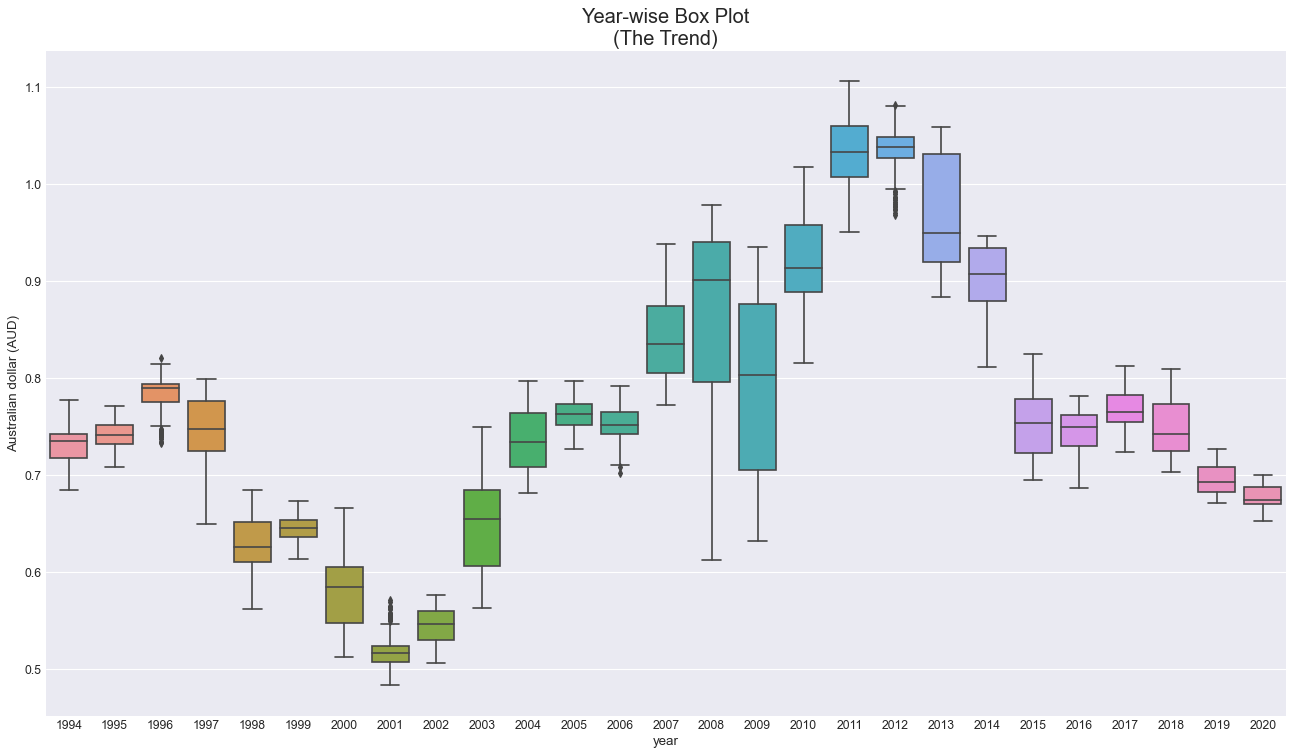

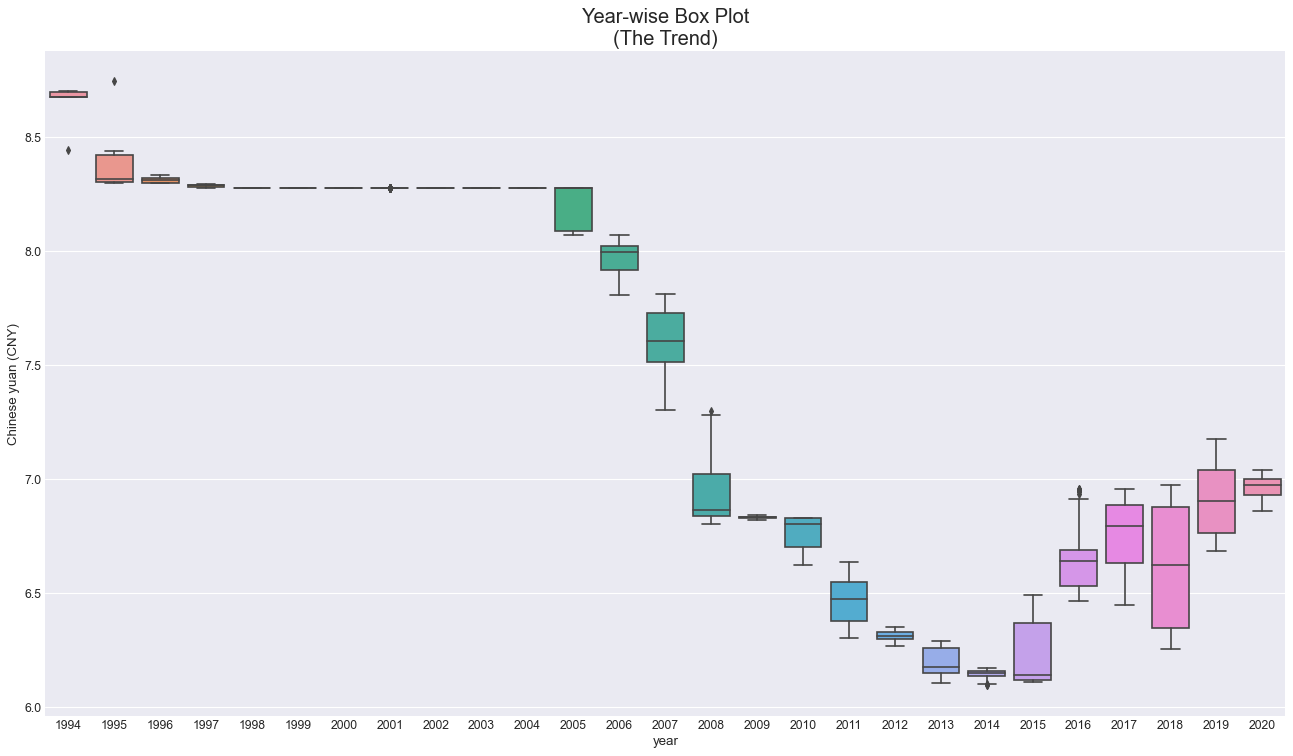

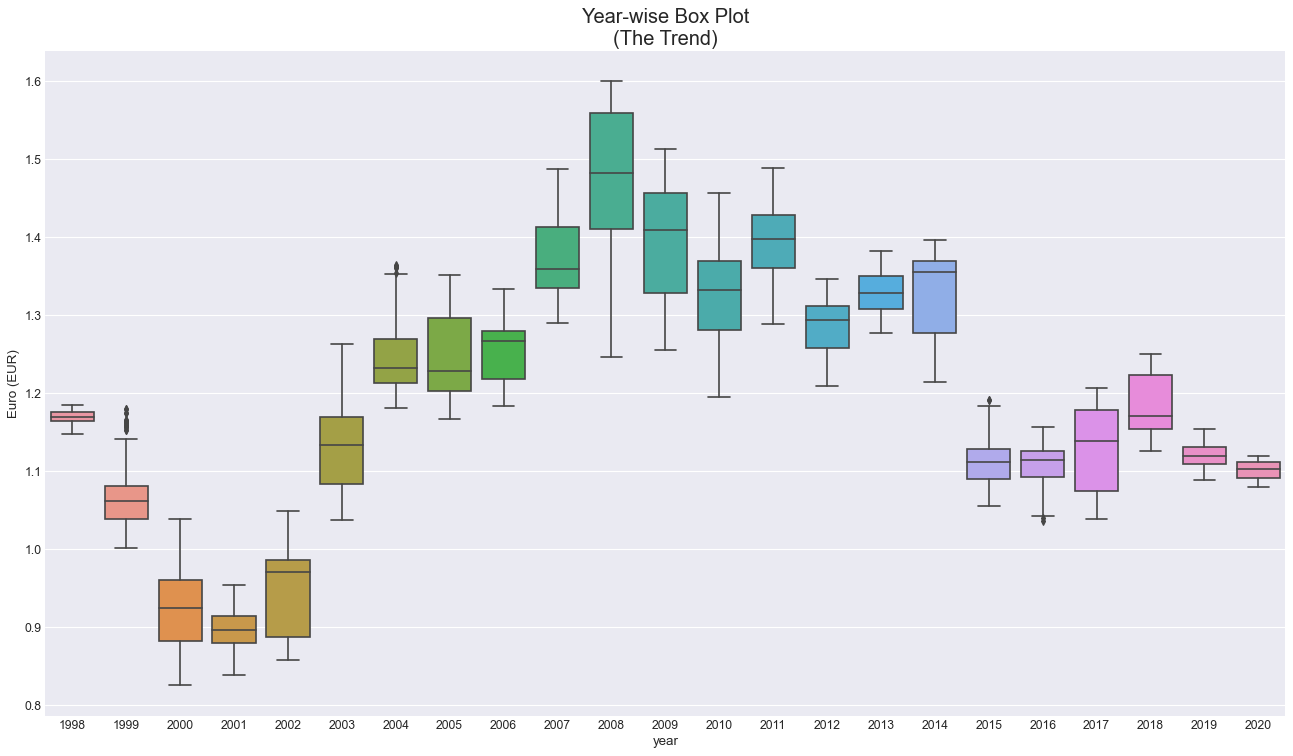

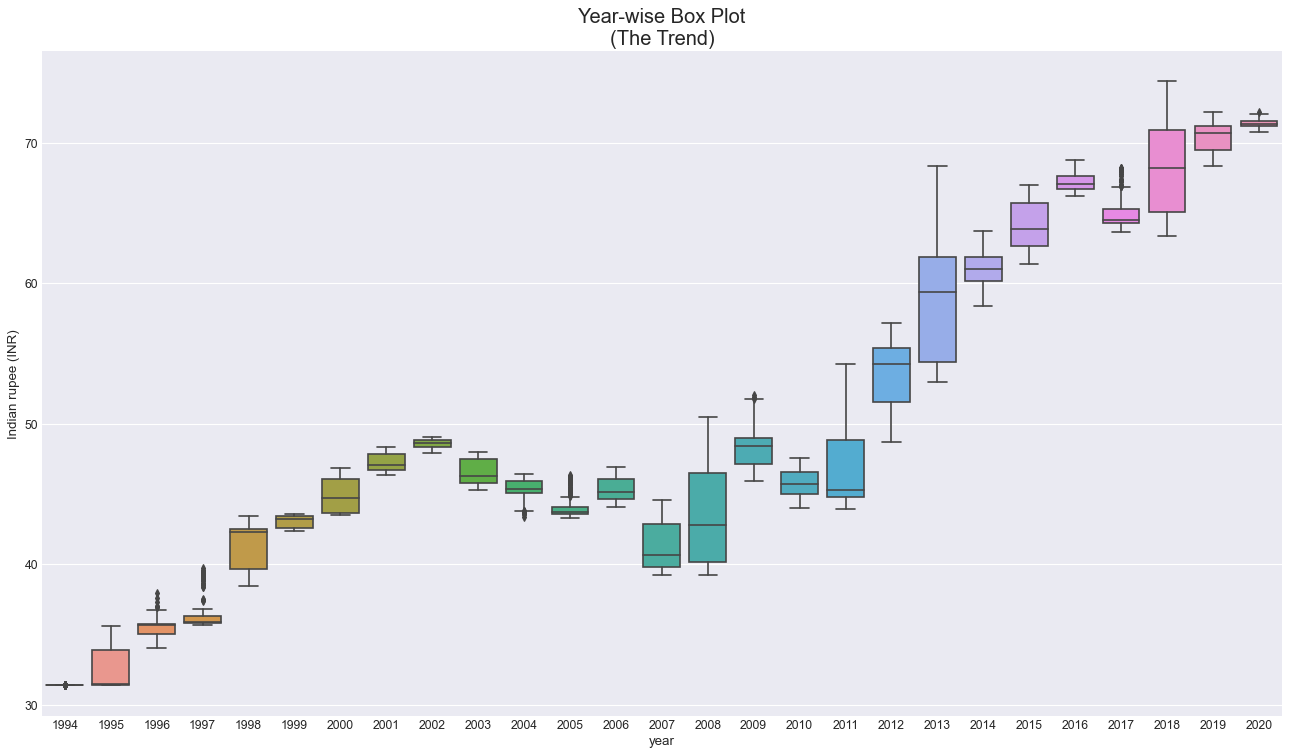

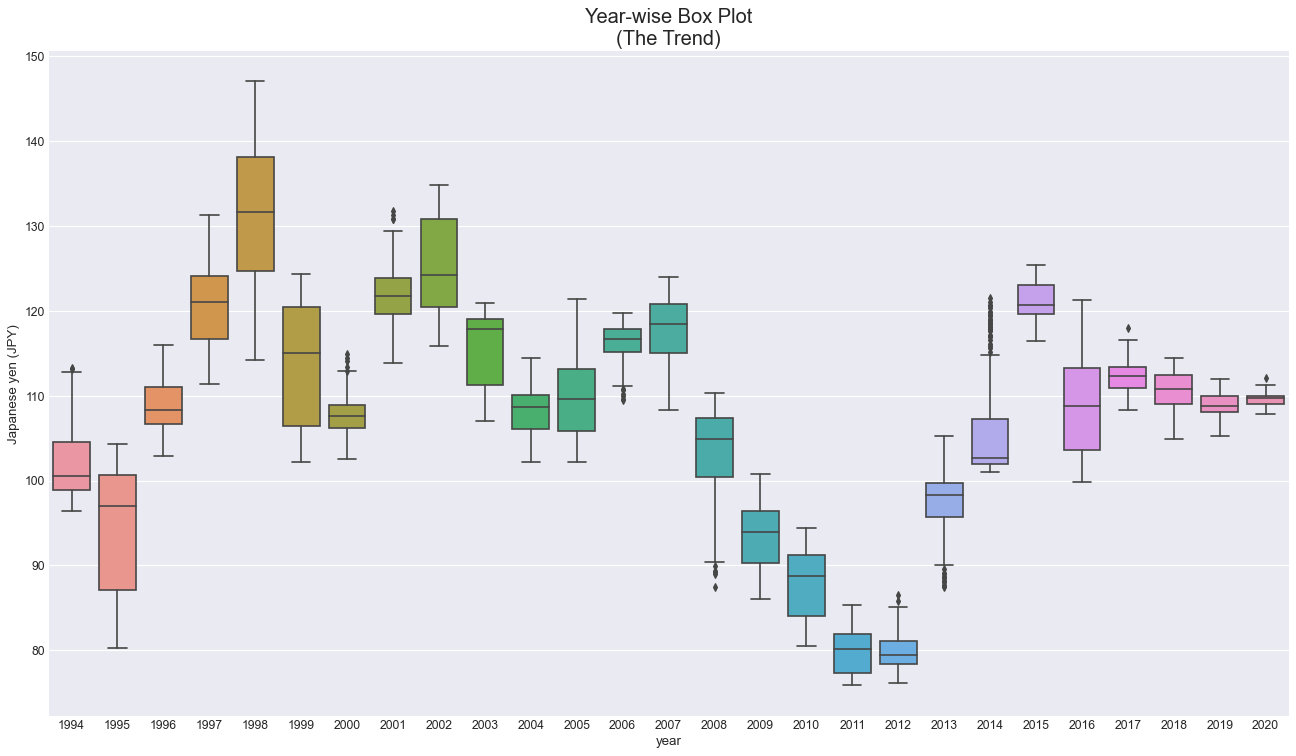

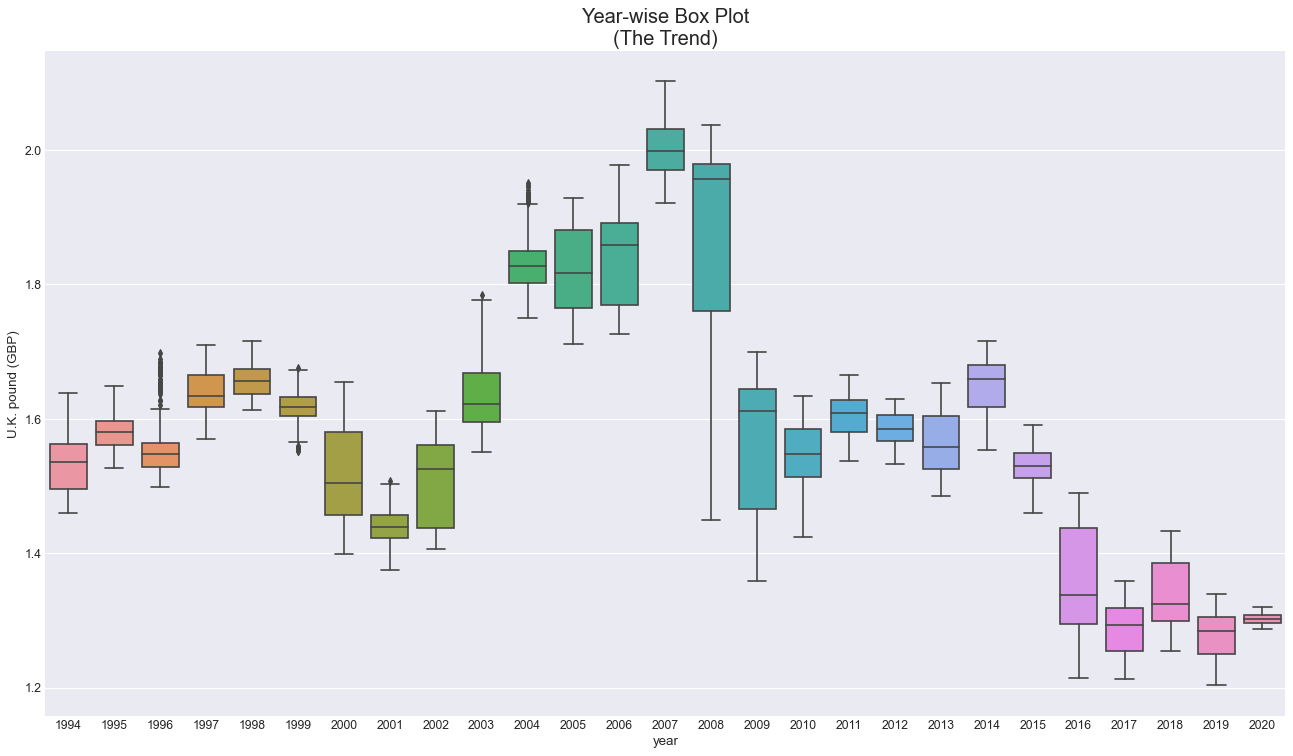

In [24]:
plt.figure(figsize=(19.2,10.8), facecolor = (0.900, 0.900, 0.900))
plt.style.use('seaborn-darkgrid')
palette = ['magenta','blue','green','red',
          'black','indigo','teal']
num=0
for x in data:
    if x.columns[0] not in majorCurrencies:
        continue
    num+=1
    df = deepcopy(x)
    df.reset_index(inplace=True)
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()
    fig, axes = plt.subplots(1, figsize=(20,11), dpi= 80)
    sns.boxplot(x='year', y=df.columns[1], data=df, ax=axes)
    axes.set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
    plt.show()

## Auto Correlation Function Plot

In [25]:
df = deepcopy(data[5])

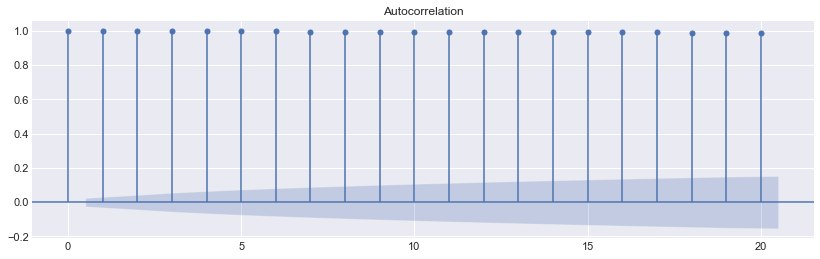

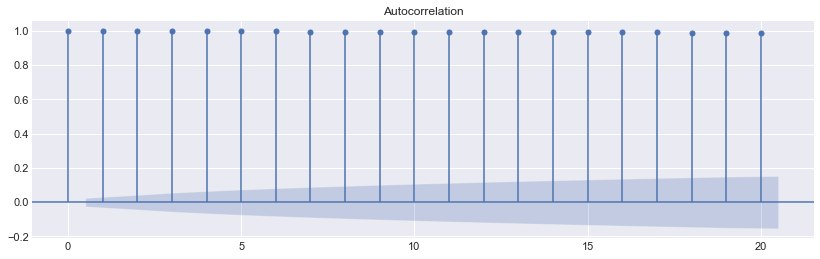

In [26]:
fig, axes = plt.subplots(1, figsize=(14,4))
plot_acf(df[df.columns[0]],lags = 20, ax = axes)

## Seasonal Decomposition

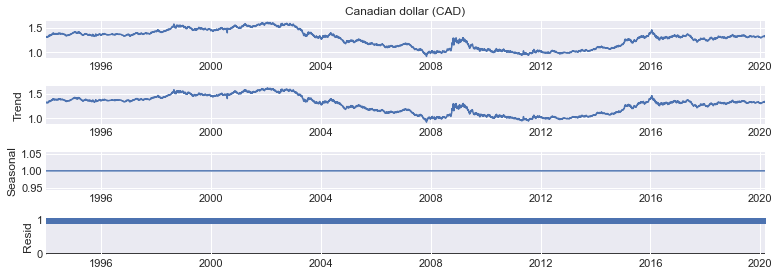

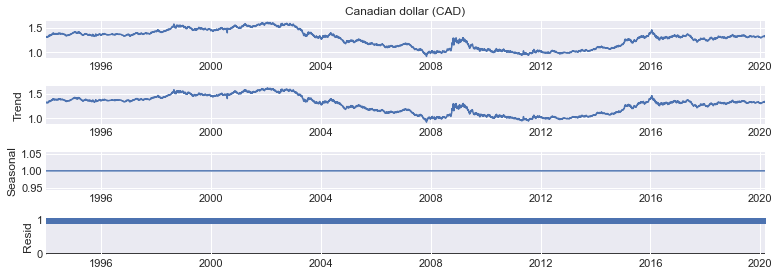

In [27]:
sdec = seasonal_decompose(df[df.columns[0]], model = 'multiplicative', period = 1)
sdec.plot()

# Forecasting using XGBoost with Bayesian optimization

In [28]:
df = deepcopy(data[12])

In [29]:
print(df.columns)

Index(['Indian rupee (INR)'], dtype='object')


In [30]:
df.reset_index(inplace = True)

In [31]:
df.rename(columns = {df.columns[0] : 'Date', df.columns[1]:'rate'},inplace = True)

In [32]:
print(df.head())

        Date   rate
0 1994-01-03  31.37
1 1994-01-04  31.37
2 1994-01-05  31.37
3 1994-01-06  31.37
4 1994-01-07  31.37


In [33]:
df['day'] = df.Date.dt.day
df['dayofweek'] = df.Date.dt.dayofweek
df['dayofyear'] = df.Date.dt.dayofyear
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

<ipython-input-33-c0b5b974505a>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.Date.dt.week


In [34]:
for i in range(1,8):
    df['lag'+str(i)] = df.rate.shift(i).fillna(0)

In [35]:
df.drop('Date',axis = 1, inplace = True)

In [36]:
print(df.head(12))

     rate  day  dayofweek  dayofyear  week  month  year   lag1   lag2   lag3  \
0   31.37    3          0          3     1      1  1994   0.00   0.00   0.00   
1   31.37    4          1          4     1      1  1994  31.37   0.00   0.00   
2   31.37    5          2          5     1      1  1994  31.37  31.37   0.00   
3   31.37    6          3          6     1      1  1994  31.37  31.37  31.37   
4   31.37    7          4          7     1      1  1994  31.37  31.37  31.37   
5   31.37   10          0         10     2      1  1994  31.37  31.37  31.37   
6   31.37   11          1         11     2      1  1994  31.37  31.37  31.37   
7   31.37   12          2         12     2      1  1994  31.37  31.37  31.37   
8   31.37   13          3         13     2      1  1994  31.37  31.37  31.37   
9   31.37   14          4         14     2      1  1994  31.37  31.37  31.37   
10  31.37   17          0         17     3      1  1994  31.37  31.37  31.37   
11  31.37   18          1         18    

In [37]:
x = df.drop('rate', axis = 1)
y = df.rate

test_size = 50
x_train, x_test = x[:-test_size], x[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

print('x-train: ', x_train.shape)
print('y-train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x-train:  (6180, 13)
y-train:  (6180,)
x_test:  (50, 13)
y_test:  (50,)


In [38]:
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test)

In [39]:
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=300, nfold=5)    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [40]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
xgb_bo.maximize(init_points=10, n_iter=15, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -0.2467   |  0.691    |  0.9809   |  5.457    |
|  2        | -0.2395   |  0.6646   |  0.1004   |  4.249    |
|  3        | -0.2464   |  0.6302   |  0.961    |  6.037    |
|  4        | -0.2566   |  0.4872   |  0.9175   |  6.761    |
|  5        | -0.236    |  0.7263   |  0.1379   |  6.071    |
|  6        | -0.2652   |  0.4446   |  0.8529   |  4.507    |
|  7        | -0.2619   |  0.3573   |  0.6544   |  5.36     |
|  8        | -0.2589   |  0.4168   |  0.1182   |  3.723    |
|  9        | -0.2423   |  0.8116   |  0.7557   |  3.193    |
|  10       | -0.2352   |  0.8964   |  0.723    |  6.641    |
|  11       | -0.258    |  0.5834   |  0.7216   |  3.907    |
|  12       | -0.2447   |  0.4045   |  0.05604  |  6.957    |
|  13       | -0.2328   |  0.7993   |  0.2002   |  6.009    |
|  14       | -0.2491   |  0.5815   |  0.6732   |  5.946    |
|  15   

In [41]:
params = xgb_bo.max['params']
params['max_depth'] = int(round(params['max_depth']))
model = xgb.train(params, dtrain, num_boost_round=200)

In [42]:
predictions = model.predict(dtest)

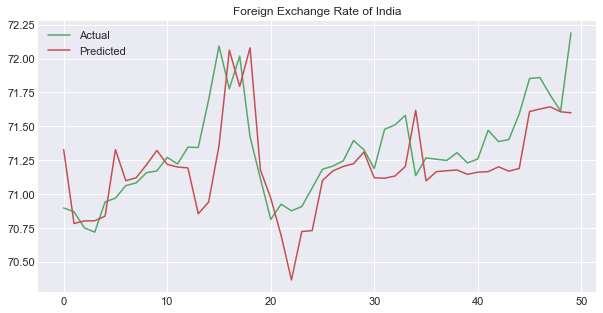

In [43]:
y_test = df.rate[-test_size:].values
plt.figure(figsize = (10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test, label = 'Actual',color = 'g')
plt.plot(predictions, label = 'Predicted', color = 'r')
plt.legend()

In [44]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 0.2956999998024881


In [45]:
print('R2-score:',r2_score(y_test, predictions))

R2-score: 0.24631535365293789
